<a href="https://colab.research.google.com/github/t95532/Innomatics/blob/main/internship_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#internship Assignment 5
#yonex-mavis-350-nylon-shuttle-yellow review
#determine customer satisfaction level on the product
#identifing the sentiment of the tex

# New Section

In [ ]:
path = '/content/data.csv'

In [ ]:
#import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(path)

In [ ]:
data

Reviewer Name               Review Title  \
0               Kamal Suresh               Nice product   
1          Flipkart Customer     Don't waste your money   
2     A. S. Raja Srinivasan   Did not meet expectations   
3        Suresh Narayanasamy                       Fair   
4                  ASHIK P A                Over priced   
...                      ...                        ...   
8513                     NaN                        NaN   
8514                     NaN                        NaN   
8515                     NaN                        NaN   
8516                     NaN                        NaN   
8517                     NaN                        NaN   

                  Place of Review  Up Votes  Down Votes     Month  \
0      Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1      Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2     Certified Buyer, Dharmapuri      42.0         3.0  Apr 2021   
3        Certified Buyer, Chennai      25.0         1.0       NaN   
4                             NaN     147.0        24.0  Apr 2016   
...                           ...       ...         ...       ...   
8513                          NaN       NaN         NaN       NaN   
8514                          NaN       NaN         NaN       NaN   
8515                          NaN       NaN         NaN       NaN   
8516                          NaN       NaN         NaN       NaN   
8517                          NaN       NaN         NaN       NaN   

                                            Review text  Ratings  
0     Nice product, good quality, but price is now r...        4  
1     They didn't supplied Yonex Mavis 350. Outside ...        1  
2     Worst product. Damaged shuttlecocks packed in ...        1  
3     Quite O. K. , but nowadays  the quality of the...        3  
4     Over pricedJust â?¹620 ..from retailer.I didn'...        1  
...                                                 ...      ...  
8513                                                NaN        5  
8514                                                NaN        2  
8515                                                NaN        4  
8516                                                NaN        1  
8517                                                NaN        4  

[8518 rows x 8 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [ ]:
data.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

<Axes: >

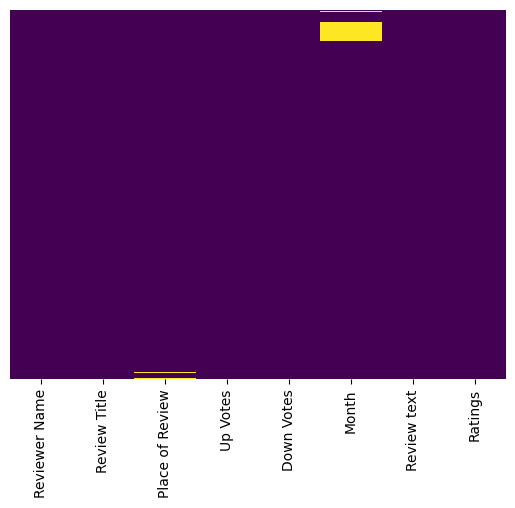

In [ ]:
sns.heatmap(data.isnull(), yticklabels = False, cbar=False, cmap='viridis')

<Axes: xlabel='Ratings', ylabel='count'>

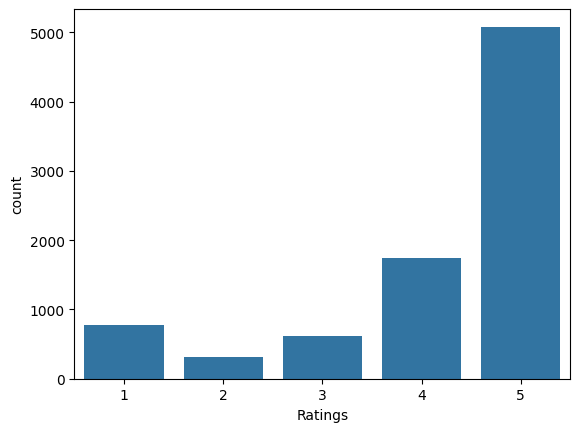

In [ ]:
#Ratings of the customers
sns.countplot(data=data, x='Ratings')

In [ ]:
#since! from the above plot we could observe majority the customers are happy with the product

In [ ]:
#consider only necessary features
data = data[['Review Title','Review text','Ratings']]

In [ ]:
data

Review Title  \
0                  Nice product   
1        Don't waste your money   
2     Did not meet expectations   
3                          Fair   
4                   Over priced   
...                         ...   
8513                        NaN   
8514                        NaN   
8515                        NaN   
8516                        NaN   
8517                        NaN   

                                            Review text  Ratings  
0     Nice product, good quality, but price is now r...        4  
1     They didn't supplied Yonex Mavis 350. Outside ...        1  
2     Worst product. Damaged shuttlecocks packed in ...        1  
3     Quite O. K. , but nowadays  the quality of the...        3  
4     Over pricedJust â?¹620 ..from retailer.I didn'...        1  
...                                                 ...      ...  
8513                                                NaN        5  
8514                                                NaN        2  
8515                                                NaN        4  
8516                                                NaN        1  
8517                                                NaN        4  

[8518 rows x 3 columns]

In [ ]:
data=data.dropna()

In [ ]:
data

Review Title  \
0                  Nice product   
1        Don't waste your money   
2     Did not meet expectations   
3                          Fair   
4                   Over priced   
...                         ...   
8503   Yones Mavis 350 Blue cap   
8504               For Mavis350   
8505                  Very Good   
8506     Don't waste your money   
8507                Really Nice   

                                            Review text  Ratings  
0     Nice product, good quality, but price is now r...        4  
1     They didn't supplied Yonex Mavis 350. Outside ...        1  
2     Worst product. Damaged shuttlecocks packed in ...        1  
3     Quite O. K. , but nowadays  the quality of the...        3  
4     Over pricedJust â?¹620 ..from retailer.I didn'...        1  
...                                                 ...      ...  
8503  Wrost and duplicate productDon't buy this sell...        1  
8504        Received product intact and sealedREAD MORE        5  
8505  Delivered before time but price is high from m...        3  
8506  up to the mark but same is available in market...        4  
8507                       Nice delivery speedREAD MORE        5  

[8508 rows x 3 columns]

In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
corpus = []

In [ ]:
for i in range(0, len(data)):
    sym = re.sub('[^a-zA-Z]', " ", data['Review text'][i])
    sym = sym.lower()
    sym = sym.split()

    sym = [ps.stem(word) for word in sym if word not in stopwords.words('english')]
    sym = ' '.join(sym)
    corpus.append(sym)

In [ ]:
len(corpus)

8508

In [ ]:
data['stem_review'] = corpus

<ipython-input-21-cd7b98a01f00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stem_review'] = corpus


In [ ]:
data.head()

Review Title  \
0               Nice product   
1     Don't waste your money   
2  Did not meet expectations   
3                       Fair   
4                Over priced   

                                         Review text  Ratings  \
0  Nice product, good quality, but price is now r...        4   
1  They didn't supplied Yonex Mavis 350. Outside ...        1   
2  Worst product. Damaged shuttlecocks packed in ...        1   
3  Quite O. K. , but nowadays  the quality of the...        3   
4  Over pricedJust â?¹620 ..from retailer.I didn'...        1   

                                         stem_review  
0  nice product good qualiti price rise bad sign ...  
1  suppli yonex mavi outsid cover yonex ad insid ...  
2  worst product damag shuttlecock pack new box o...  
3  quit k nowaday qualiti cork like year back use...  
4  pricedjust retail understand wat advantag buy ...

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
l1 = []
for i in data['Review text']:
  z =  sent_pipeline(i)[0]['label']
  l1.append(z)

In [ ]:
data['Label'] = l1
data['Label']

<ipython-input-26-49b560b3e983>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = l1


0       POSITIVE
1       NEGATIVE
2       NEGATIVE
3       POSITIVE
4       NEGATIVE
          ...   
8503    NEGATIVE
8504    POSITIVE
8505    NEGATIVE
8506    NEGATIVE
8507    POSITIVE
Name: Label, Length: 8508, dtype: object

In [ ]:
data["Label"].value_counts()

POSITIVE    6475
NEGATIVE    2033
Name: Label, dtype: int64

<Axes: xlabel='Ratings', ylabel='count'>

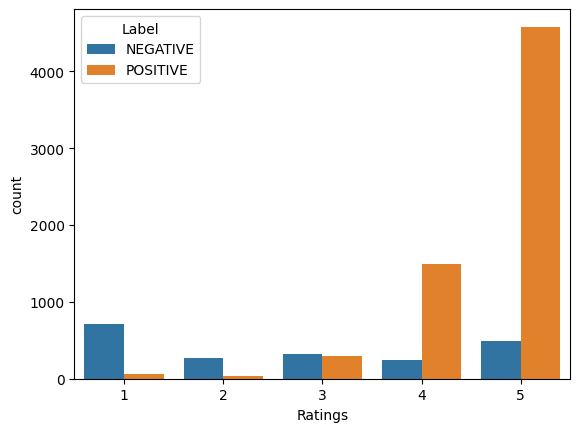

In [ ]:
sns.countplot(data=data, x='Ratings', hue="Label")

In [ ]:
#we could see negative comments with 5 rating

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data['Review text']))

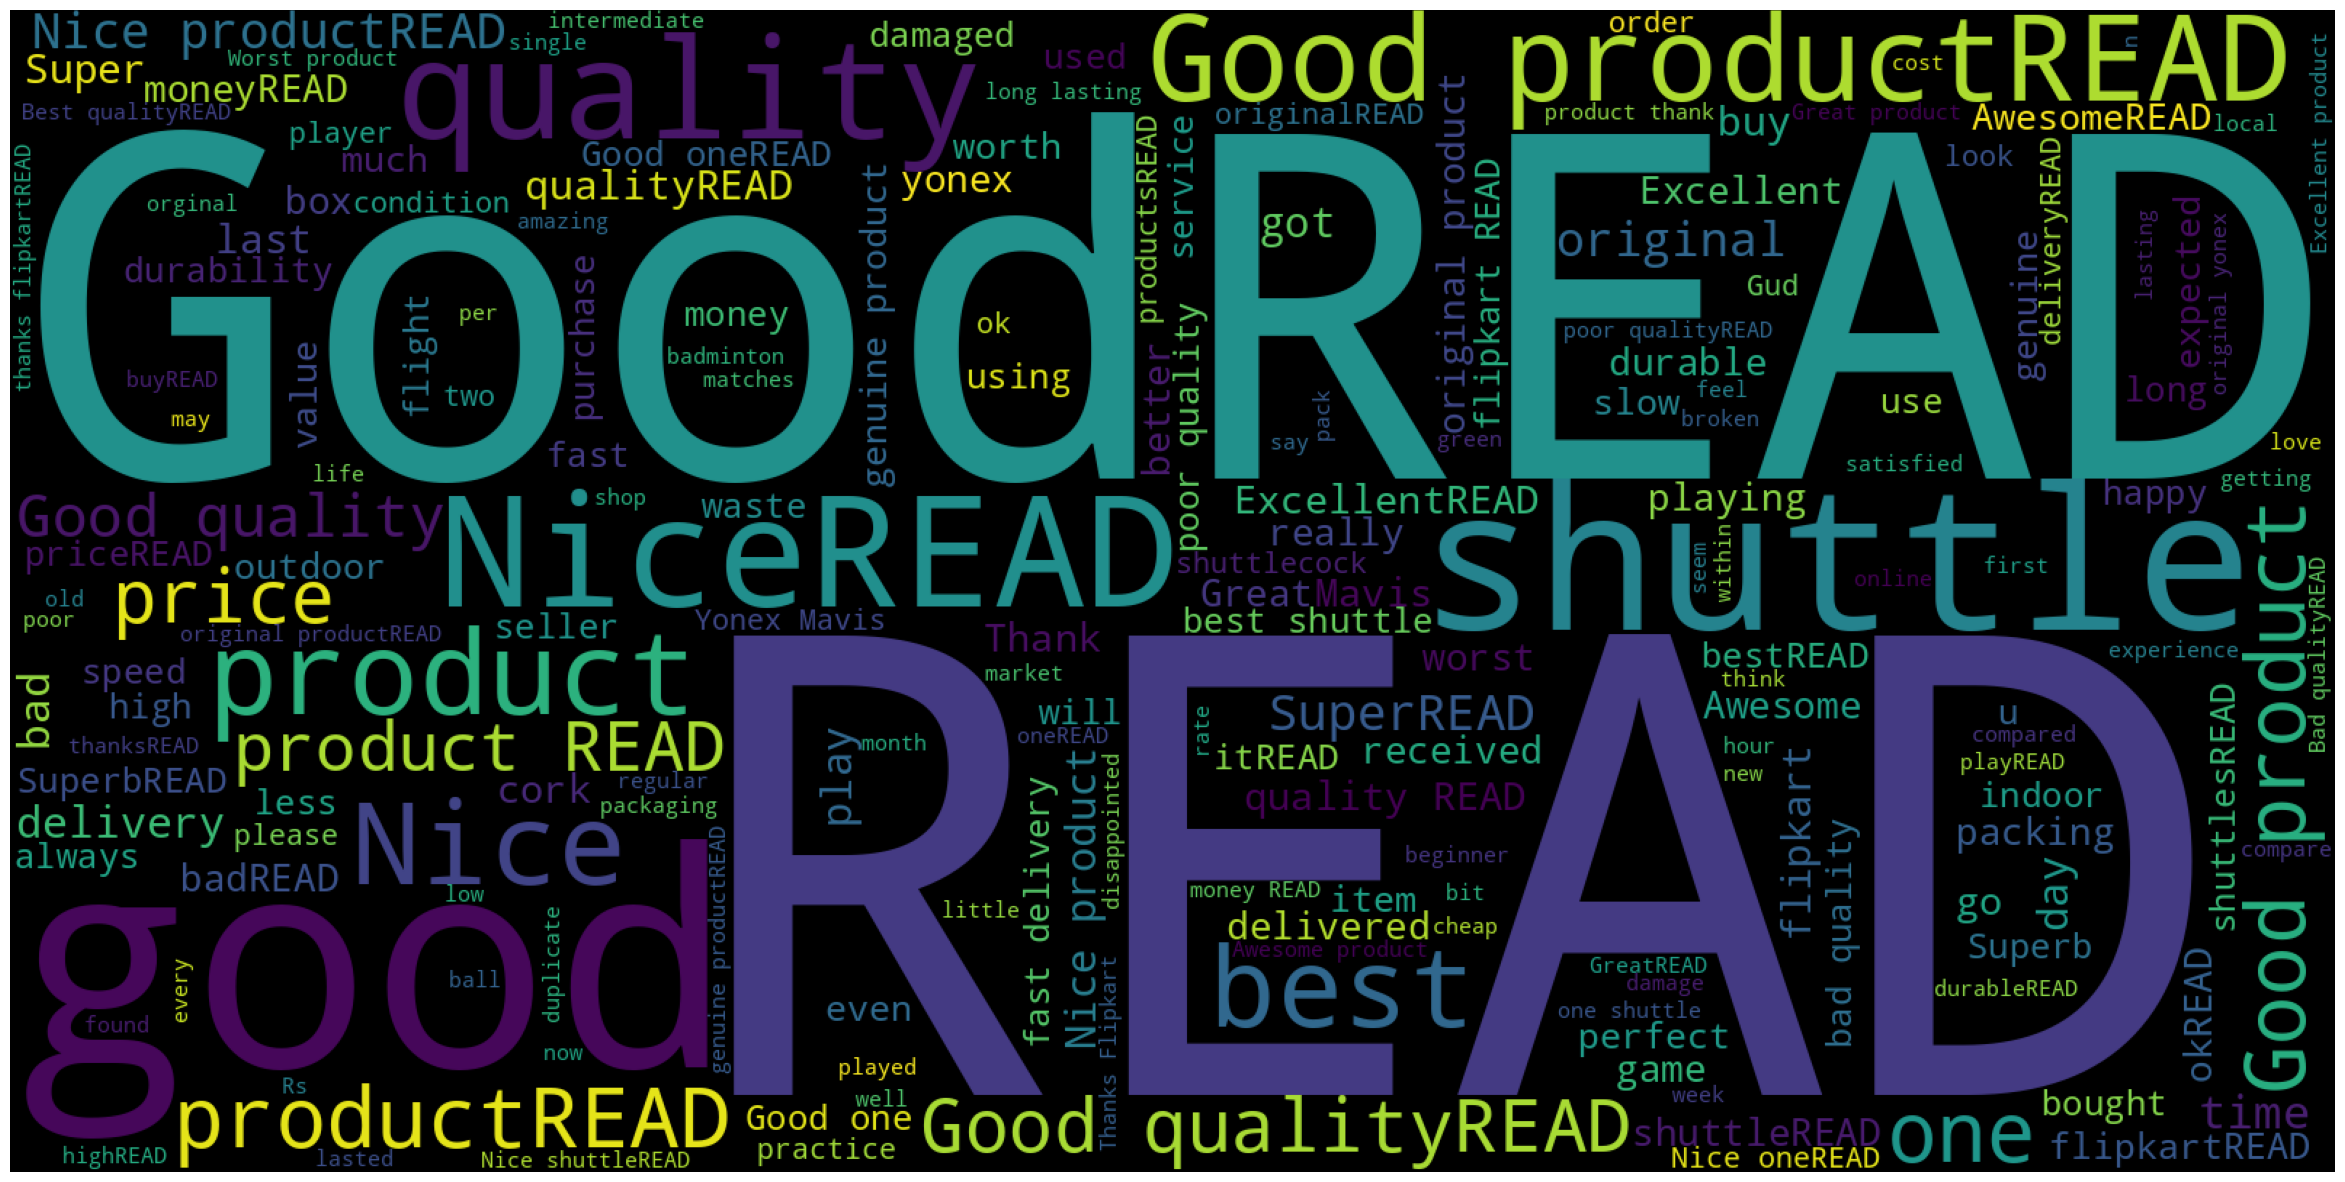

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
X = data['Review text']
y = data['Label']

In [ ]:
#splitting into train and test
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=123, test_size = .30)

In [ ]:
X_train = X_train.str.replace('READ MORE', '')

In [ ]:
X_train

6995                                                 Good
558                                          good product
6433                                Genuine yonex product
6976    many shuttles started having wobbly flight on ...
2026                          Original product.I love it.
                              ...                        
7382                                    Looks not genuine
7763                                         Nice product
5218                                         good quality
1346                                                 Good
3582                                         Good quality
Name: Review text, Length: 5955, dtype: object

In [ ]:
X_test = X_test.str.replace('READ MORE', '')

In [ ]:
X_test

1071                                                 Good
156     Very bad product a word to describe I write du...
3114                              very bad very fast poor
1833                                                 Nice
8356                                            Very good
                              ...                        
3144    Quality is good and the product is same how i ...
6983                             awesome product loved it
3950    This Product is perfect for regular badminton ...
2982                                                 Good
3872                                                 nice
Name: Review text, Length: 2553, dtype: object

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

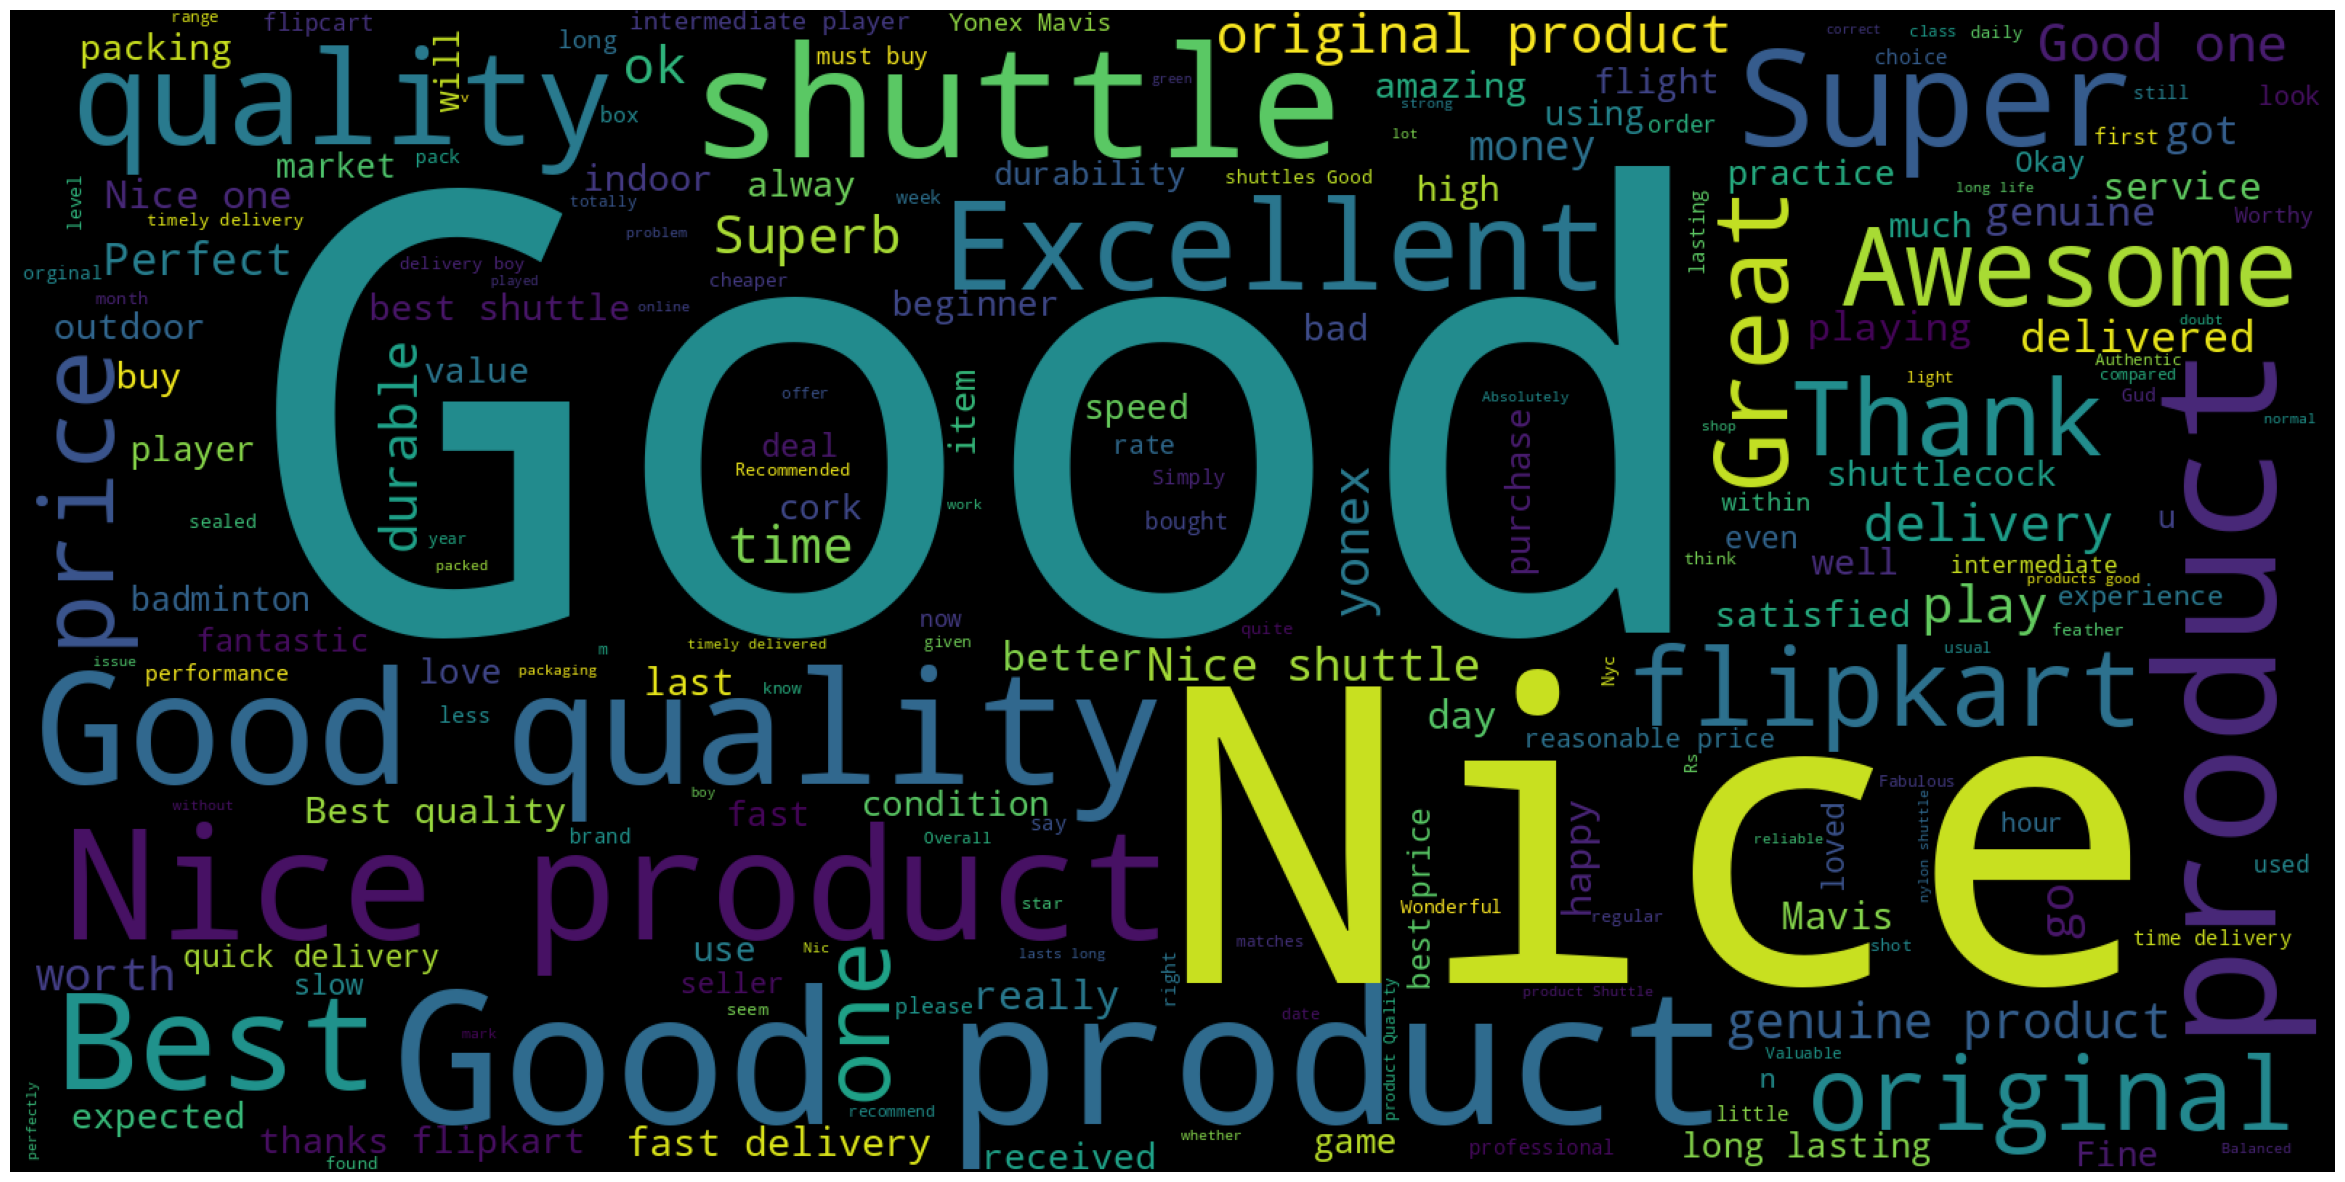

In [ ]:
display_wordcloud(X_train[y_train=='POSITIVE'])

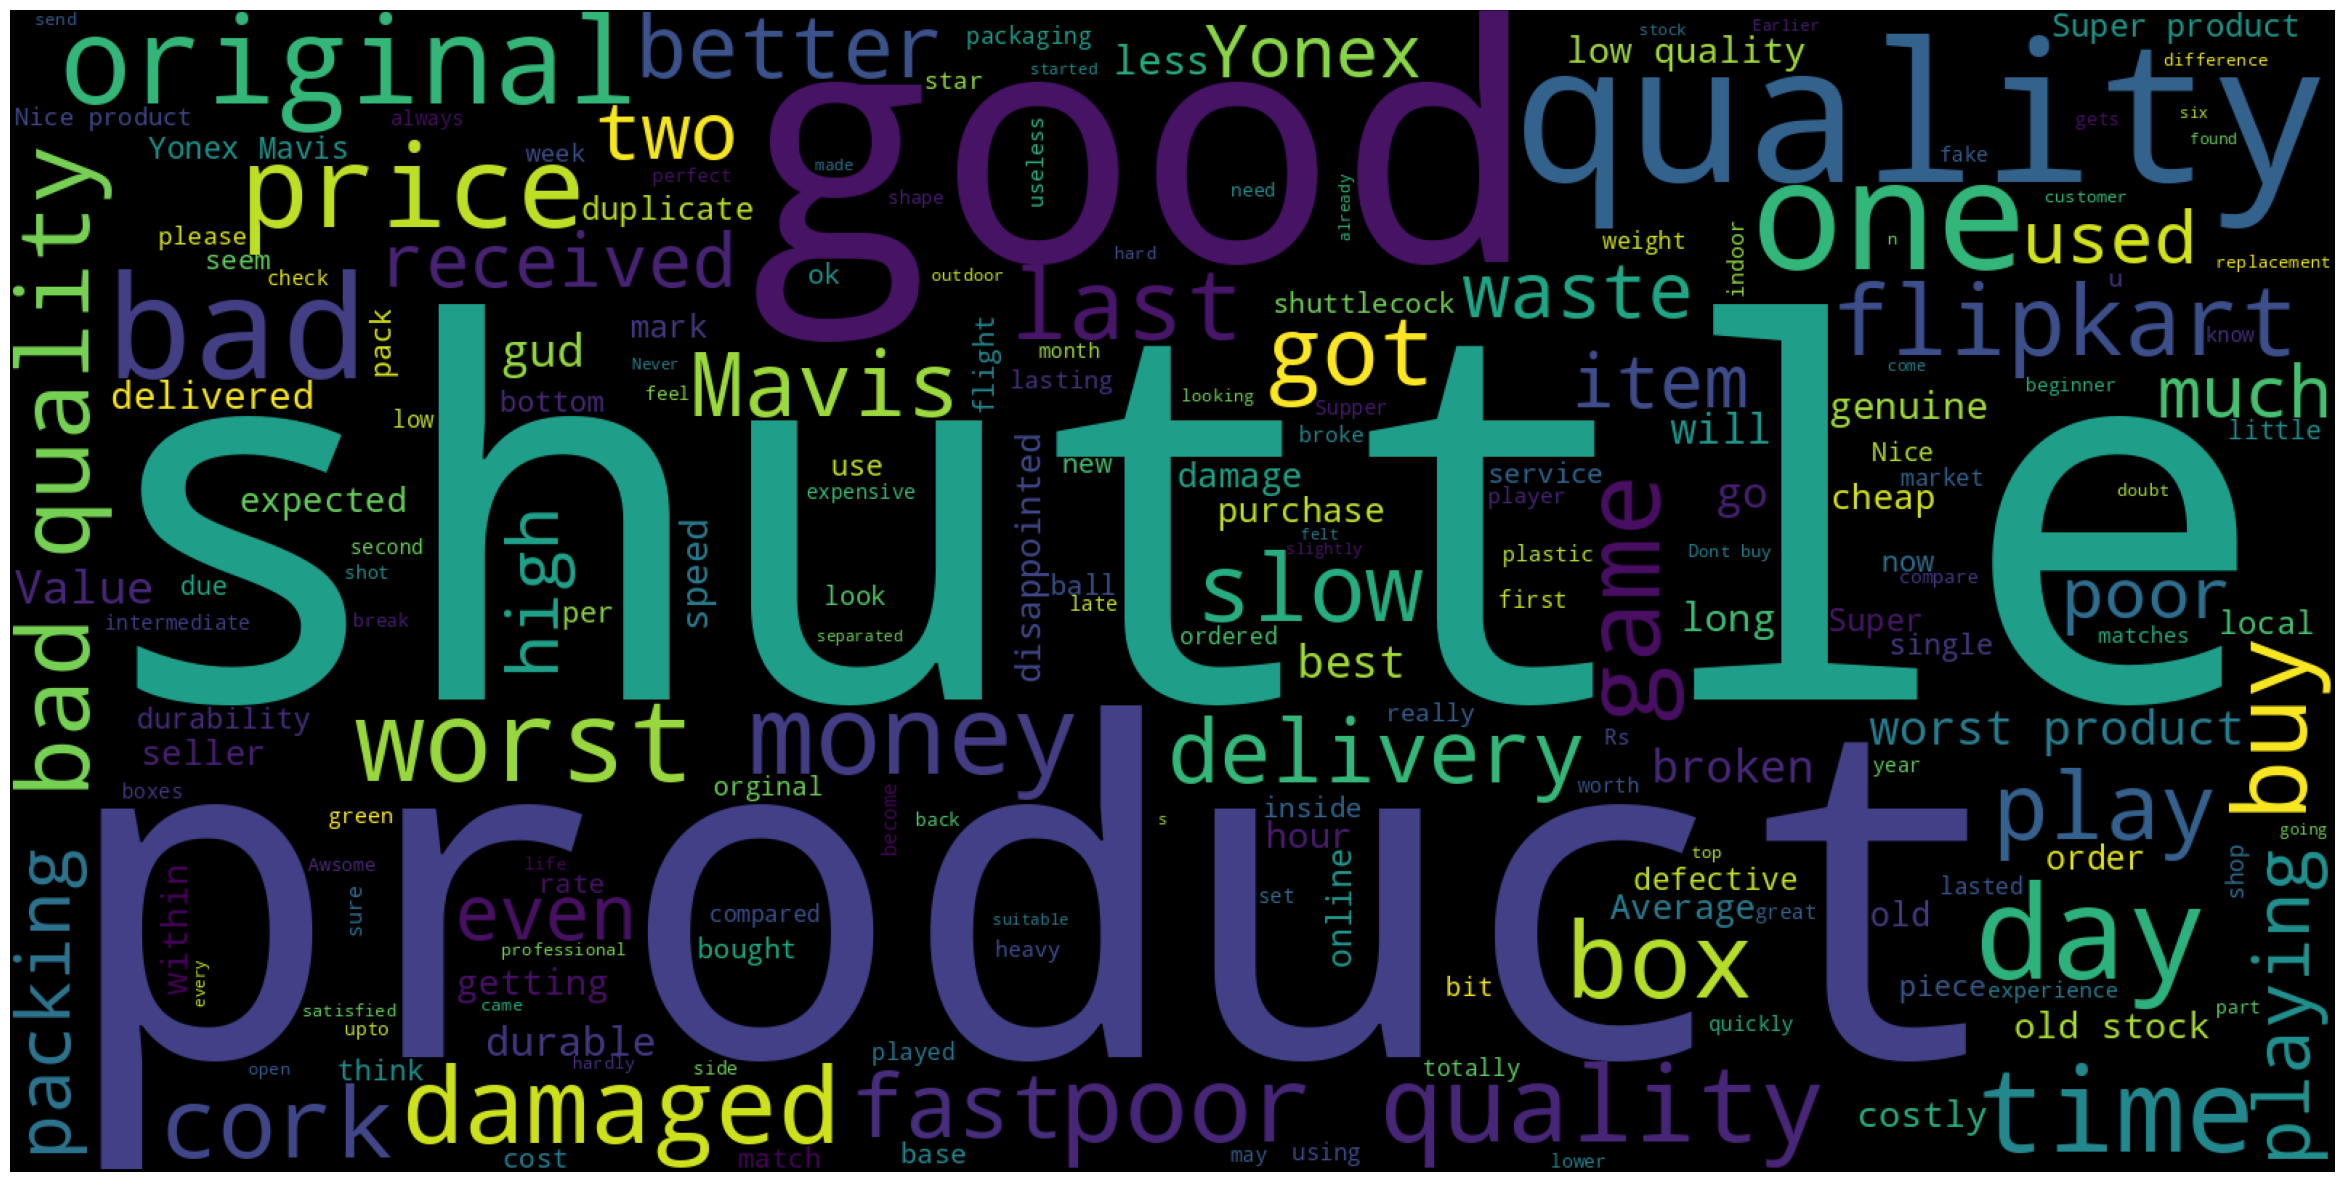

In [ ]:
display_wordcloud(X_train[y_train=='NEGATIVE'])

In [ ]:

import string

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def clean(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")

    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    # Join and return
    return " ".join(filtered_tokens)

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: user 2.66 s, sys: 148 ms, total: 2.8 s
Wall time: 2.81 s
(5955, 2402)


In [ ]:
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(2553, 2402)


In [ ]:
from sklearn.preprocessing import LabelEncoder
enco = LabelEncoder()
y_train = enco.fit_transform(y_train)
y_test = enco.transform(y_test)

In [ ]:
#MODEL BUILDING
# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

CPU times: user 4.93 ms, sys: 0 ns, total: 4.93 ms
Wall time: 5 ms


MultinomialNB()

In [ ]:
# Step 6: Evaluate on train data

from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9047858942065491

In [ ]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 991,  468],
       [  99, 4397]])

Text(0.5, 23.52222222222222, 'Predicted')

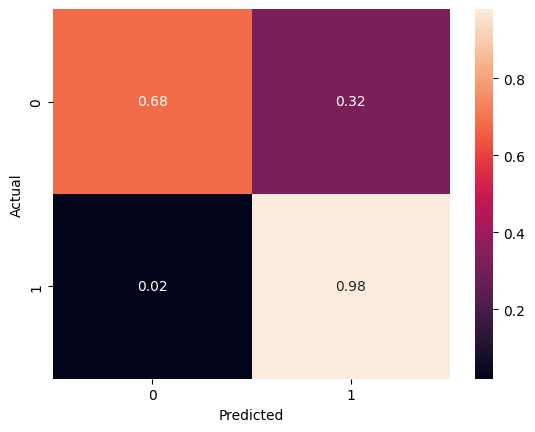

In [ ]:
cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:

# make class predictions for X_test_dtm
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.8848413631022327

Text(0.5, 23.52222222222222, 'Predicted')

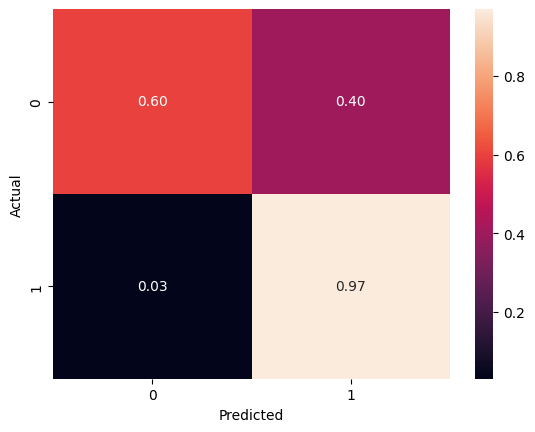

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9394295481252003
Test Score (F1 Score): 0.928675400291121


In [ ]:
enco.classes_

array(['NEGATIVE', 'POSITIVE'], dtype=object)

In [ ]:
##1:POSITIVE, 0:NEGATIVE

In [ ]:
#APPLYING ALL STEPS AGAIN

In [ ]:
vect = CountVectorizer(preprocessor=clean, max_features=5000) # instantiate a vectoriezer
%time X_train_dtm = vect.fit_transform(X_train) # use it to extract features from training data

# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

CPU times: user 2.38 s, sys: 163 ms, total: 2.54 s
Wall time: 3.99 s
(5955, 2402) (2553, 2402)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

CPU times: user 3.9 ms, sys: 1.01 ms, total: 4.91 ms
Wall time: 7.56 ms


MultinomialNB()

In [ ]:
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

metrics.f1_score(y_train, y_train_pred)

0.9394295481252003

Text(0.5, 23.52222222222222, 'Predicted')

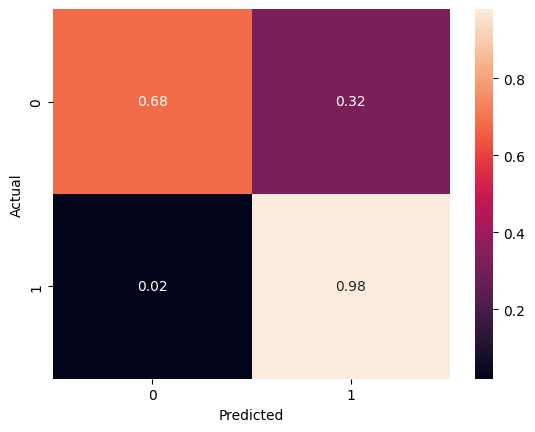

In [ ]:
cm = metrics.confusion_matrix(y_train, y_train_pred)

actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
y_test_pred = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

metrics.f1_score(y_test, y_test_pred)

0.928675400291121

Text(0.5, 23.52222222222222, 'Predicted')

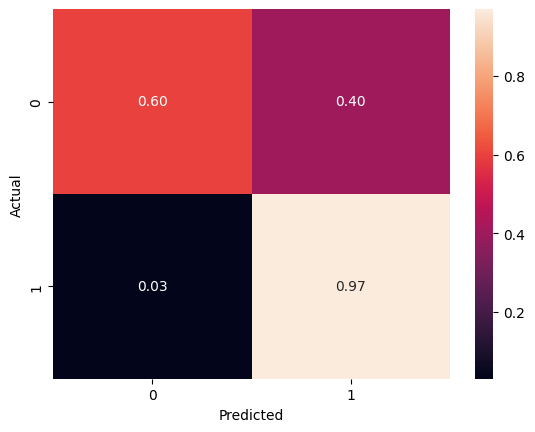

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
#CREATING A OPTIMAL WORKFLOW

In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV


In [ ]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES,
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 1min 24s, sys: 5.55 s, total: 1min 30s
Wall time: 1min 32s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x7e1d887b1090>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.928676111382511


In [ ]:
import joblib
from joblib import Memory

import os

In [ ]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ],
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__preprocessor': [clean],
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 1min 17s, sys: 4.82 s, total: 1min 22s
Wall time: 1min 27s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x7e1d887b1090>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.928676111382511


In [ ]:
best_model = clf.best_estimator_

joblib.dump(best_model, 'demo_model_nb.pkl')

['demo_model_nb.pkl']

In [ ]:
model = joblib.load('demo_model_nb.pkl')

In [ ]:
new_data = [input()]
new_data_clean = [clean(doc) for doc in new_data]
prediction = model.predict(new_data_clean)

print("Prediction:", prediction)

They didn't supplied Yonex Mavis 350. Outside
Prediction: [0]


In [ ]:
data

Review Title  \
0                  Nice product   
1        Don't waste your money   
2     Did not meet expectations   
3                          Fair   
4                   Over priced   
...                         ...   
8503   Yones Mavis 350 Blue cap   
8504               For Mavis350   
8505                  Very Good   
8506     Don't waste your money   
8507                Really Nice   

                                            Review text  Ratings  \
0     Nice product, good quality, but price is now r...        4   
1     They didn't supplied Yonex Mavis 350. Outside ...        1   
2     Worst product. Damaged shuttlecocks packed in ...        1   
3     Quite O. K. , but nowadays  the quality of the...        3   
4     Over pricedJust â?¹620 ..from retailer.I didn'...        1   
...                                                 ...      ...   
8503  Wrost and duplicate productDon't buy this sell...        1   
8504        Received product intact and sealedREAD MORE        5   
8505  Delivered before time but price is high from m...        3   
8506  up to the mark but same is available in market...        4   
8507                       Nice delivery speedREAD MORE        5   

                                            stem_review     Label  
0     nice product good qualiti price rise bad sign ...  POSITIVE  
1     suppli yonex mavi outsid cover yonex ad insid ...  NEGATIVE  
2     worst product damag shuttlecock pack new box o...  NEGATIVE  
3     quit k nowaday qualiti cork like year back use...  POSITIVE  
4     pricedjust retail understand wat advantag buy ...  NEGATIVE  
...                                                 ...       ...  
8503  wrost duplic productdon buy seller productflip...  NEGATIVE  
8504                   receiv product intact sealedread  POSITIVE  
8505                   deliv time price high marketread  NEGATIVE  
8506                  mark avail market less price read  NEGATIVE  
8507                            nice deliveri speedread  POSITIVE  

[8508 rows x 5 columns]

In [ ]:
new_data = [input()]
new_data_clean = [clean(doc) for doc in new_data]
prediction = model.predict(new_data_clean)

#print("Prediction:", prediction[0])
if prediction[0] ==0:
    print("Apologies for the negative experience; we'll strive to improve. Thanks for your feedback!")
else:
    print("Thank you for the positive feedback! We'll continue to strive for improvement.")

Over pricedJust â?¹620 ..from retailer.I didn't understand.. Wat is d advantage of buying dis frm flipkrtREAD MORE
Prediction: [0]
